# 2 - Analyse BiVariée

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


from matplotlib import gridspec
from datetime import datetime

In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(df.info())
    display(df.head())
    display(df.describe().T)
    display(df.nunique())

In [3]:
# Importation du dataFrame 'df_enrichi'
df_enrichi = pd.read_csv("df_enrichi.csv", index_col="date_2", parse_dates= True)

# Vérifier que la première colonne est une idex
df_enrichi.index = pd.to_datetime(df_enrichi.index)

# Trier sur la colonne date
df_enrichi = df_enrichi.sort_index()

# Visualisualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  679111 non-null  int64  
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  float64
 4   age         679111 non-null  float64
 5   id_prod     679111 non-null  object 
 6   date        679111 non-null  object 
 7   session_id  679111 non-null  object 
 8   price       679111 non-null  float64
 9   categ       679111 non-null  float64
 10  _merge      679111 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.2+ MB


None

,Unnamed: 0,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
date_2,,,,,,,,,,,
2021-03-01 00:01:07.843138,129502,c_329,f,1967.0,55.0,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0.0,both
2021-03-01 00:02:26.047414,17306,c_664,m,1960.0,62.0,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0.0,both
2021-03-01 00:02:38.311413,146527,c_580,m,1988.0,34.0,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0.0,both
2021-03-01 00:04:54.559692,506717,c_7912,f,1989.0,33.0,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0.0,both
2021-03-01 00:05:18.801198,218220,c_2033,f,1956.0,66.0,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0.0,both


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,679111.0,339599.602812,196104.276737,0.00,169777.50,339555.00,509332.50,679331.0
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


Unnamed: 0    679111
client_id       8600
sex                2
birth             76
age               76
id_prod         3265
date          679111
session_id    342275
price           1442
categ              3
_merge             1
dtype: int64

### 2.1 -  Analyse BiVariée "sex-age"

In [4]:
# visualisation du nombre de femmes et d'hommes par age
df_total_clients_par_genre = df_enrichi.sort_values(by=['sex'])

df_total_clients_par_genre.pivot_table(df_total_clients_par_genre,
                                  index = 'age',
                                  columns = 'sex',
                                  aggfunc = 'count',)

Unnamed: 0       _merge       birth       categ       client_id        \
sex           f     m      f     m     f     m     f     m         f     m   
age                                                                          
18.0       7901  7248   7901  7248  7901  7248  7901  7248      7901  7248   
19.0       2003  2368   2003  2368  2003  2368  2003  2368      2003  2368   
20.0       1915  2669   1915  2669  1915  2669  1915  2669      1915  2669   
21.0       2474  1778   2474  1778  2474  1778  2474  1778      2474  1778   
22.0       2583  1830   2583  1830  2583  1830  2583  1830      2583  1830   
...         ...   ...    ...   ...   ...   ...   ...   ...       ...   ...   
89.0        247    79    247    79   247    79   247    79       247    79   
90.0        287    24    287    24   287    24   287    24       287    24   
91.0         47   123     47   123    47   123    47   123        47   123   
92.0        174    52    174    52   174    52   174    52       174    52   
93.0         49   152     49   152    49   152    49   152        49   152   

      date       id_prod       price       session_id        
sex      f     m       f     m     f     m          f     m  
age                                                          
18.0  7901  7248    7901  7248  7901  7248       7901  7248  
19.0  2003  2368    2003  2368  2003  2368       2003  2368  
20.0  1915  2669    1915  2669  1915  2669       1915  2669  
21.0  2474  1778    2474  1778  2474  1778       2474  1778  
22.0  2583  1830    2583  1830  2583  1830       2583  1830  
...    ...   ...     ...   ...   ...   ...        ...   ...  
89.0   247    79     247    79   247    79        247    79  
90.0   287    24     287    24   287    24        287    24  
91.0    47   123      47   123    47   123         47   123  
92.0   174    52     174    52   174    52        174    52  
93.0    49   152      49   152    49   152         49   152  

[76 rows x 18 columns]

FEMMES
Moyenne age femmes: 44.03
Médiane age femmes: 43.0
Mode age femmes: 18.0
Variance age femmes: 292.05
Écart type age femmes: 17.09
Min age femmes; 18.0
Max age femmes; 93.0
Coefficient d'asymétrie skewness age femmes: 0.37
Coefficient d'asymétrie kurtosis age femmes: -0.61
__________________________________________________
HOMMES
Moyenne age hommes: 43.43
Médiane age hommes: 42.0
Mode age hommes: 18.0
Variance age hommes: 278.97
Écart type age hommes: 16.7
Min age hommes; 18.0
Max age hommes; 93.0
Coefficient d'asymétrie skewness age hommes: 0.35
Coefficient d'asymétrie kurtosis age hommes: -0.67


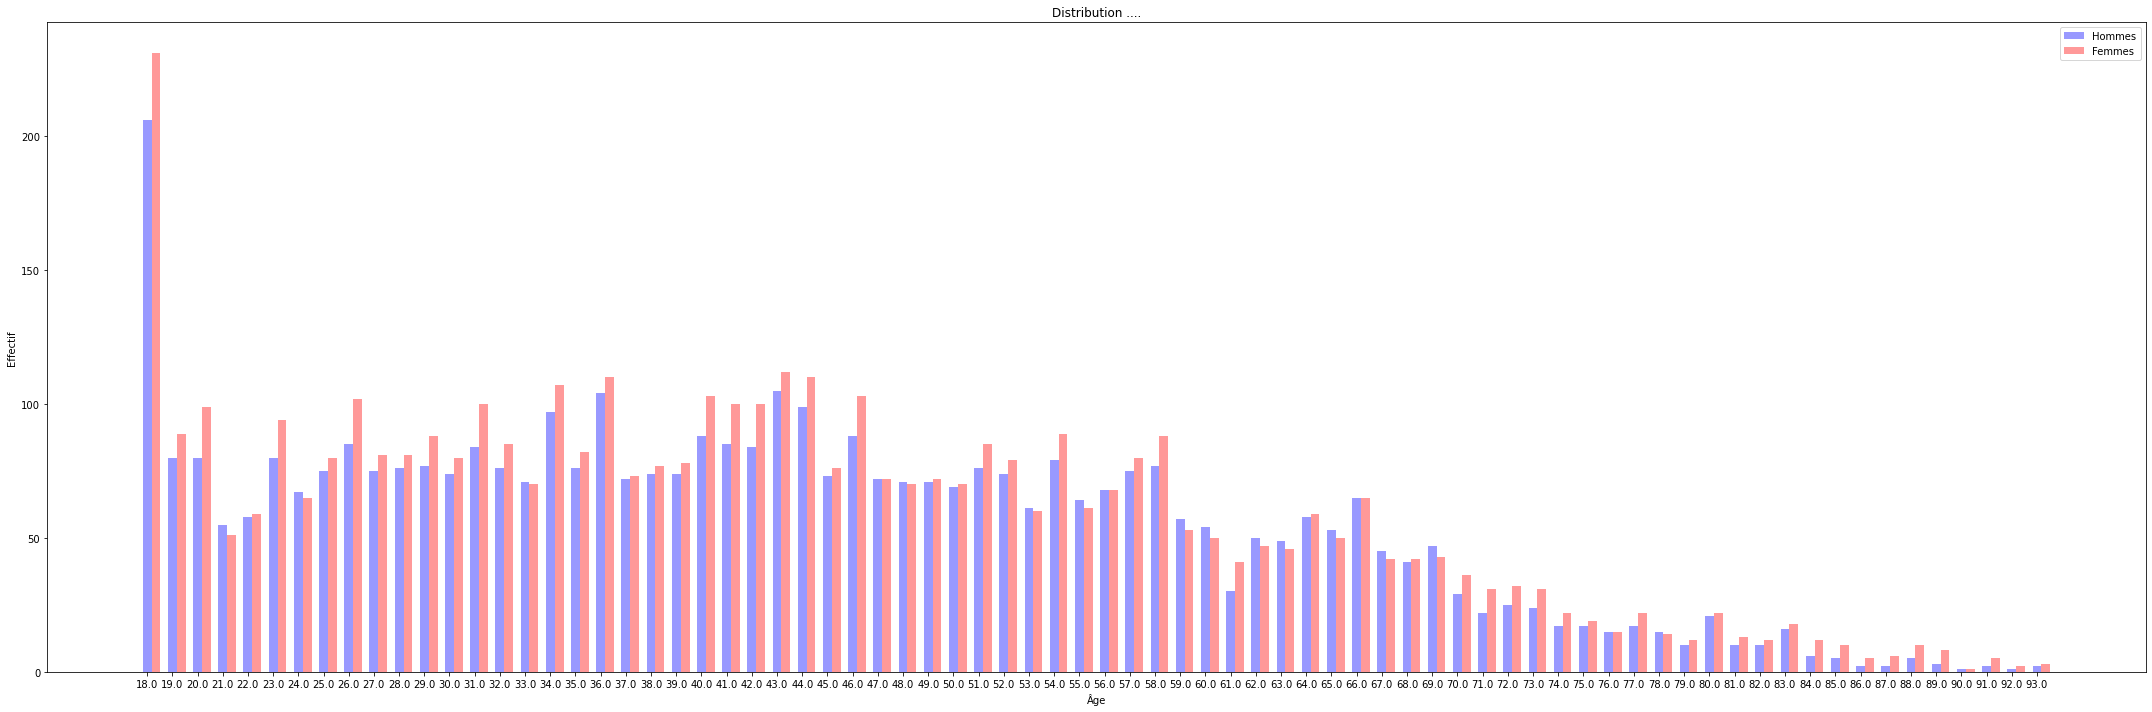

In [5]:
# Création de df par genre
df_age_genre = df_enrichi[["client_id", "sex", "age"]].drop_duplicates()
df_age_hommes = df_age_genre[df_age_genre["sex"] == "m"]
df_age_femmes = df_age_genre[df_age_genre["sex"] == "f"]

# Print des valeurs Femmes
print("FEMMES")
print("Moyenne age femmes:", round(df_age_femmes["age"].mean(),2))
print("Médiane age femmes:", round(df_age_femmes["age"].median(),2))
print("Mode age femmes:", round(df_age_femmes["age"].mode()[0],2))
print("Variance age femmes:", round(df_age_femmes["age"].var(ddof=0),2))
print("Écart type age femmes:", round(df_age_femmes["age"].std(ddof=0),2))
print("Min age femmes;", round(df_age_femmes["age"].min(),2))
print("Max age femmes;", round(df_age_femmes["age"].max(),2))
print("Coefficient d'asymétrie skewness age femmes:", round(df_age_femmes["age"].skew(),2))
print("Coefficient d'asymétrie kurtosis age femmes:", round(df_age_femmes["age"].kurtosis(),2))

print("__________________________________________________")
# print des valeurs Hommes
print("HOMMES")
print("Moyenne age hommes:", round(df_age_hommes["age"].mean(),2))
print("Médiane age hommes:", round(df_age_hommes["age"].median(),2))
print("Mode age hommes:", round(df_age_hommes["age"].mode()[0],2))
print("Variance age hommes:", round(df_age_hommes["age"].var(ddof=0),2))
print("Écart type age hommes:", round(df_age_hommes["age"].std(ddof=0),2))
print("Min age hommes;", round(df_age_hommes["age"].min(),2))
print("Max age hommes;", round(df_age_hommes["age"].max(),2))
print("Coefficient d'asymétrie skewness age hommes:", round(df_age_hommes["age"].skew(),2))
print("Coefficient d'asymétrie kurtosis age hommes:", round(df_age_hommes["age"].kurtosis(),2))

# Création des effectifs et des modalités
effectifs = df_age_genre["age"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

effectifs_femmes = df_age_femmes["age"].value_counts()
modalites_femmes = effectifs_femmes.index # l'index de effectifs contient les modalités
effectifs_hommes = df_age_hommes["age"].value_counts()
modalites_hommes = effectifs_hommes.index # l'index de effectifs contient les modalités

fig = plt.figure(2, figsize=(30, 10))
bar_width = 0.35
opacity = 0.4
error_config = {"ecolor": "0.2"}

rects1 = plt.bar(modalites_hommes, effectifs_hommes, bar_width, alpha=opacity, color="b",
                 error_kw=error_config, label="Hommes")
rects2 = plt.bar(modalites_hommes + bar_width, effectifs_femmes, bar_width, alpha=opacity, color="r",
                 error_kw=error_config, label="Femmes")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.title("Distribution ....")
xticks = effectifs.index
ticklabels = effectifs.index
plt.xticks(xticks, ticklabels)
plt.legend()
plt.tight_layout()
plt.show()

### 2.2 - Analyse Bivariée "sex-price"

In [6]:
ca_sex = df_enrichi[["sex", "price"]]
ca_par_sex = ca_sex[["sex", "price"]].groupby("sex").sum()

analyseDataFrame(ca_sex)

La dimension de DataFrame « ca_sex » : (679111, 2) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   sex     679111 non-null  object 
 1   price   679111 non-null  float64
dtypes: float64(1), object(1)
memory usage: 15.5+ MB


None

,sex,price
date_2,,
2021-03-01 00:01:07.843138,f,11.99
2021-03-01 00:02:26.047414,m,19.37
2021-03-01 00:02:38.311413,m,4.50
2021-03-01 00:04:54.559692,f,6.55
2021-03-01 00:05:18.801198,f,16.49


,count,mean,std,min,25%,50%,75%,max
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0


sex         2
price    1442
dtype: int64

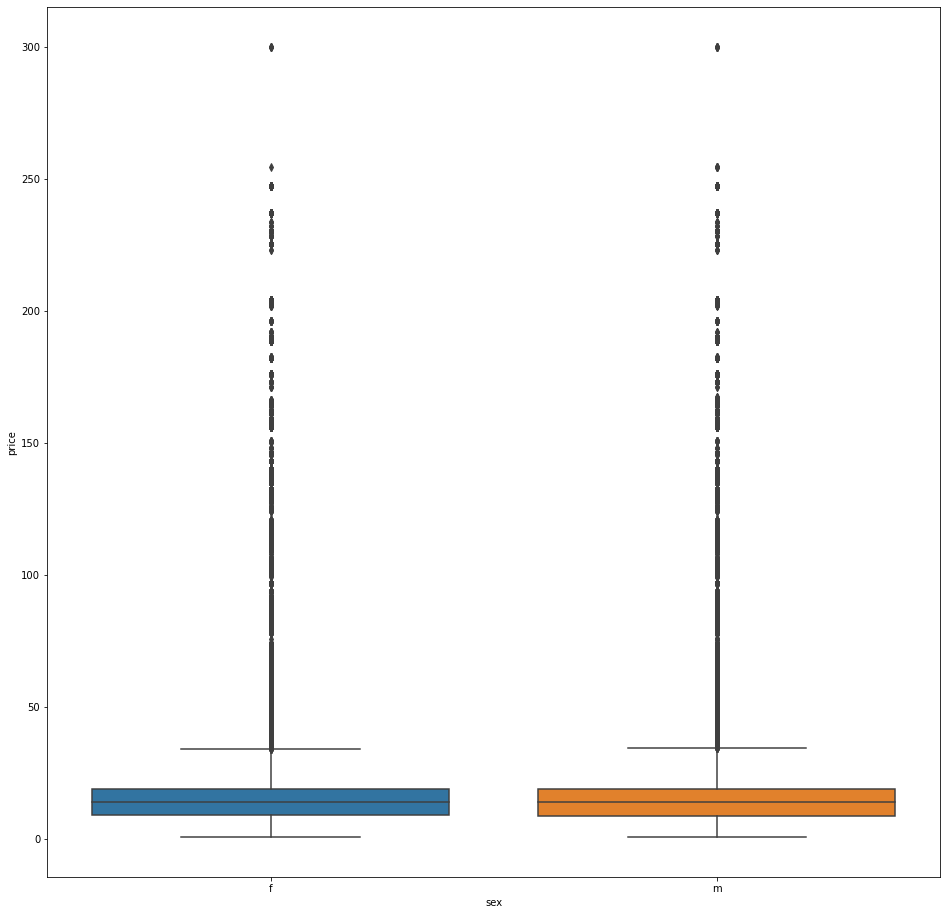

In [7]:
plt.figure(figsize=(16,16))
sns.boxplot(data=ca_sex, x="sex",y="price")

plt.show()

### 2.3 - Analyse Bivariée "age-price"

In [8]:
ca_age = df_enrichi[["age", "price"]]
ca_par_age = ca_age[["age", "price"]].groupby("age").sum()

analyseDataFrame(ca_age)

La dimension de DataFrame « ca_age » : (679111, 2) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   age     679111 non-null  float64
 1   price   679111 non-null  float64
dtypes: float64(2)
memory usage: 15.5 MB


None

,age,price
date_2,,
2021-03-01 00:01:07.843138,55.0,11.99
2021-03-01 00:02:26.047414,62.0,19.37
2021-03-01 00:02:38.311413,34.0,4.50
2021-03-01 00:04:54.559692,33.0,6.55
2021-03-01 00:05:18.801198,66.0,16.49


,count,mean,std,min,25%,50%,75%,max
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0


age        76
price    1442
dtype: int64

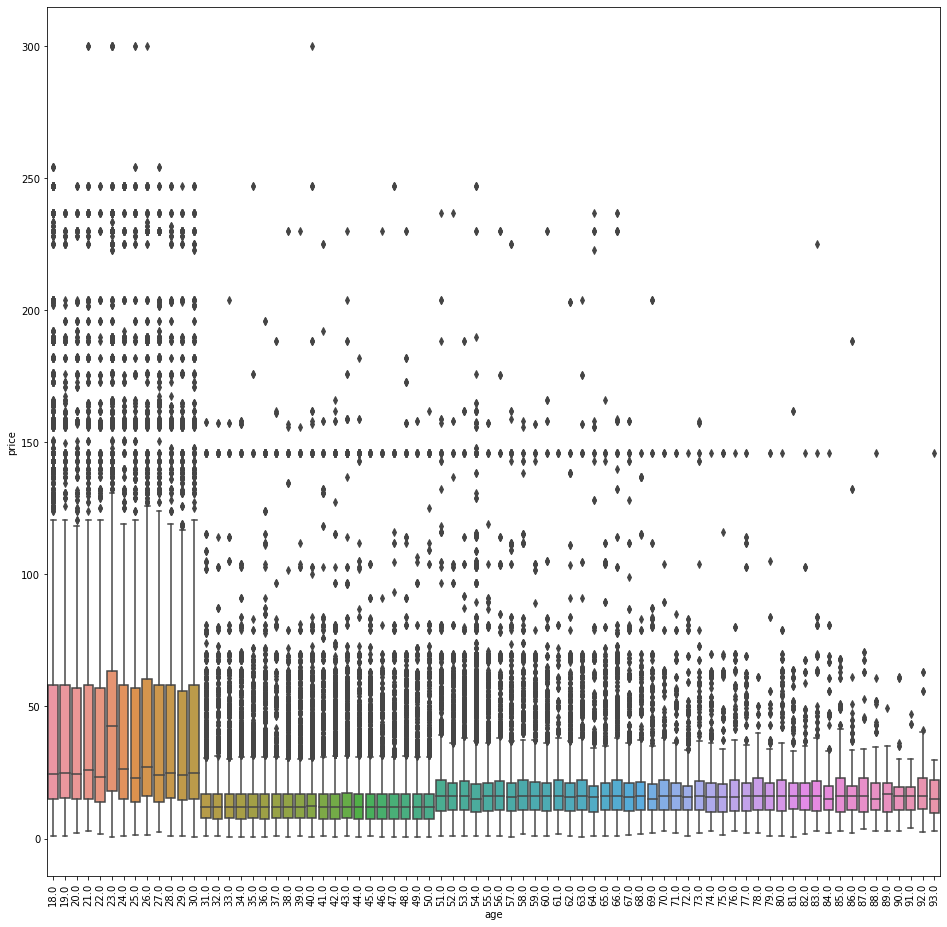

In [9]:
plt.figure(figsize=(16,16))
sns.boxplot(data=ca_age, x="age",y="price")
plt.xticks(rotation = "vertical")
plt.show()

### 2.4 - Analyse Bivariée "age-categ"

In [10]:
# Visualisation de la moyenne d'âge par catégorie
moy_categ = round(df_enrichi.groupby('categ')['age'].mean(),2)
moy_categ

categ
0.0    43.90
1.0    47.65
2.0    25.95
Name: age, dtype: float64

<AxesSubplot:xlabel='categ', ylabel='age'>

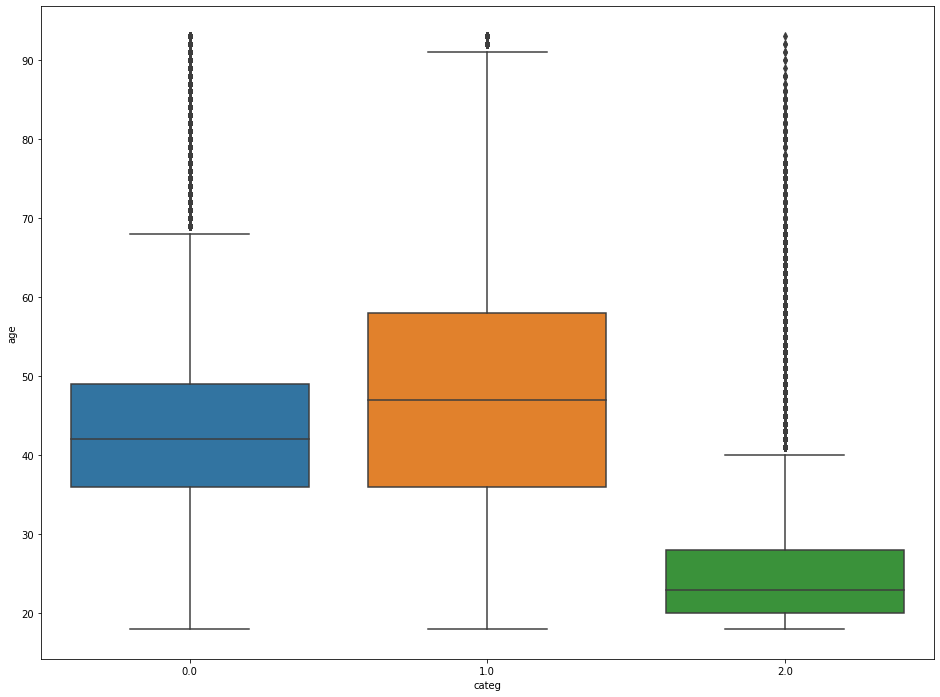

In [11]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df_enrichi, x="categ",y="age")

### 2.5 - Analyse BiVariée "sex-categ"

In [12]:
pd.crosstab(df_enrichi["categ"], df_enrichi["sex"])

sex,f,m
categ,,
0.0,206103,209356
1.0,114899,112270
2.0,17283,19200


<AxesSubplot:xlabel='sex', ylabel='categ'>

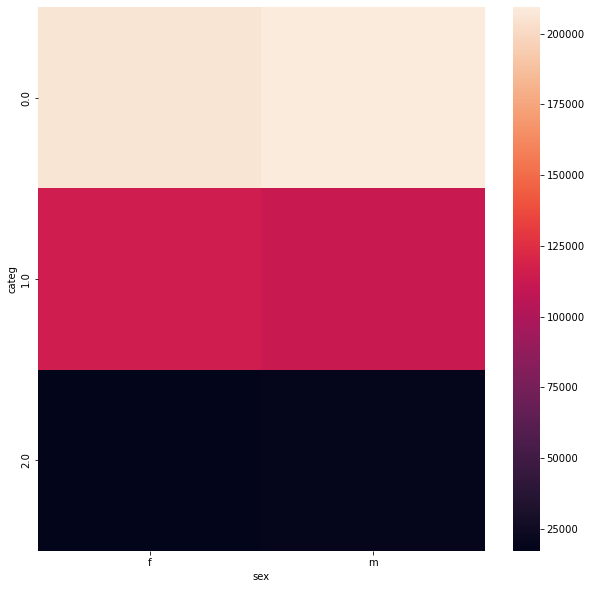

In [13]:
plt.figure(figsize=(10, 10))

sns.heatmap(pd.crosstab(df_enrichi["categ"], df_enrichi["sex"]))

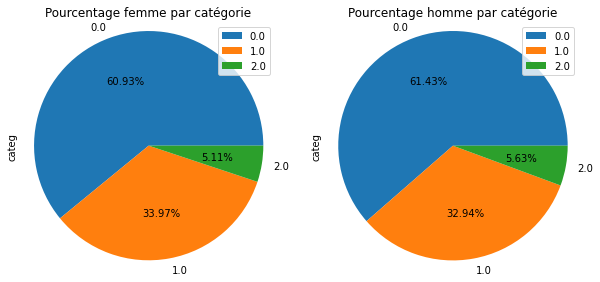

In [14]:
df_cat_sex = df_enrichi[["sex", "categ"]]
homme_cat = df_cat_sex[df_enrichi["sex"] == "m"]
femme_cat = df_cat_sex[df_enrichi["sex"] == "f"]

# visualisation de la variable categ avec piechart


# plot par catégorie pour les hommes
plt.figure(figsize=(10,10))

plt.subplot(2,2,2)
homme_cat.categ.value_counts(normalize = True).plot(kind="pie", autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Pourcentage homme par catégorie")
plt.legend()
plt.axis("equal")


# plot par catégorie pour les femmes
plt.subplot(2,2,1)
femme_cat.categ.value_counts(normalize = True).plot(kind="pie", autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Pourcentage femme par catégorie")
plt.legend()
plt.axis("equal")

plt.show()

### 2.6 - Analyse BiVariée "categ-price"

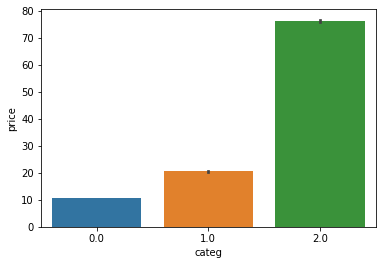

In [15]:
sns.barplot(data=df_enrichi,x="categ", y="price")

plt.show()